In [418]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import joblib
import pickle
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "svg"


In [419]:
dataset = pd.read_csv("src/get_around_pricing_project.csv")

In [420]:
print("Number of rows : {}".format(dataset.shape[0]))
print()

print("Display of dataset: ")
display(dataset.head())
print()

print("Basics statistics: ")
data_desc = dataset.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*dataset.isnull().sum()/dataset.shape[0])

Number of rows : 4843

Display of dataset: 


,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183



Basics statistics: 


,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
count,4843.000000,4843,4.843000e+03,4843.00000,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843.000000
unique,NaN,28,NaN,NaN,4,10,8,2,2,2,2,2,2,2,NaN
top,NaN,Citroën,NaN,NaN,diesel,black,estate,True,True,False,False,False,False,True,NaN
freq,NaN,969,NaN,NaN,4641,1633,1606,2662,3839,3865,3881,2613,3674,4514,NaN
mean,2421.000000,NaN,1.409628e+05,128.98823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.214536
std,1398.198007,NaN,6.019674e+04,38.99336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.568268
min,0.000000,NaN,-6.400000e+01,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
25%,1210.500000,NaN,1.029135e+05,100.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.000000
50%,2421.000000,NaN,1.410800e+05,120.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.000000
75%,3631.500000,NaN,1.751955e+05,135.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.000000



Percentage of missing values: 


Unnamed: 0                   0.0
model_key                    0.0
mileage                      0.0
engine_power                 0.0
fuel                         0.0
paint_color                  0.0
car_type                     0.0
private_parking_available    0.0
has_gps                      0.0
has_air_conditioning         0.0
automatic_car                0.0
has_getaround_connect        0.0
has_speed_regulator          0.0
winter_tires                 0.0
rental_price_per_day         0.0
dtype: float64

In [421]:
dataset = dataset.drop('Unnamed: 0', axis=1)

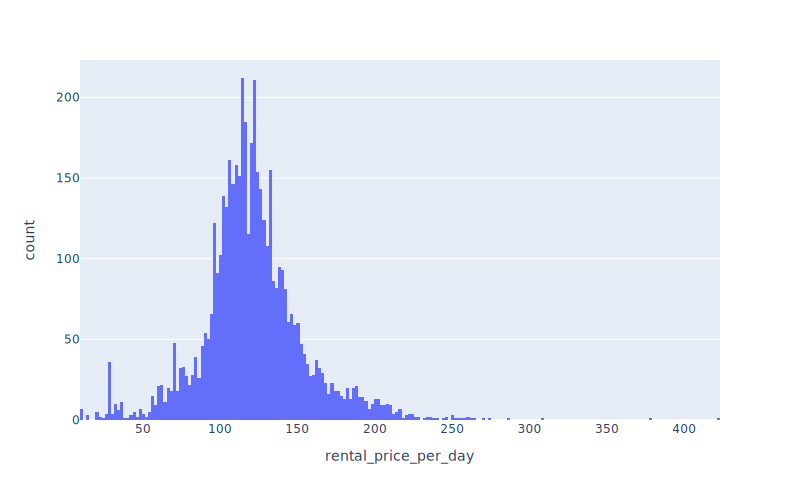

In [422]:
# check distribution of rental price per day => the distribution is quite normal
fig = px.histogram(dataset, x = 'rental_price_per_day', nbins = 300, height = 500, width = 800)
fig.show()

In [423]:
dataset['model_key'].value_counts()

Citroën        969
Renault        916
BMW            827
Peugeot        642
Audi           526
Nissan         275
Mitsubishi     231
Mercedes        97
Volkswagen      65
Toyota          53
SEAT            46
Subaru          44
Opel            33
Ferrari         33
PGO             33
Maserati        18
Suzuki           8
Porsche          6
Ford             5
KIA Motors       3
Alfa Romeo       3
Fiat             2
Lexus            2
Lamborghini      2
Mini             1
Mazda            1
Honda            1
Yamaha           1
Name: model_key, dtype: int64

In [424]:
dataset['paint_color'].value_counts()

black     1633
grey      1175
blue       710
white      538
brown      341
silver     329
red         52
beige       41
green       18
orange       6
Name: paint_color, dtype: int64

In [425]:
dataset['car_type'].value_counts()

estate         1606
sedan          1168
suv            1058
hatchback       699
subcompact      117
coupe           104
convertible      47
van              44
Name: car_type, dtype: int64

In [426]:
# remove models that are not represented enough in the dataset. I chose to remove them and not put them in an 'other' category because the models are too different from each other (example : Porsche Vs KIA Motors)
unvalid_models = ['Suzuki', 'Porsche', 'Ford', 'KIA Motors', 'Alfa Romeo', 'Fiat', 'Lexus', 'Lamborghini', 'Mini', 'Mazda', 'Honda', 'Yamaha']

In [427]:
to_drop = dataset['model_key'].isin(unvalid_models)
dataset = dataset[~to_drop]

In [428]:
dataset.shape

(4808, 14)

/home/lise/.local/lib/python3.10/site-packages/plotly/express/_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



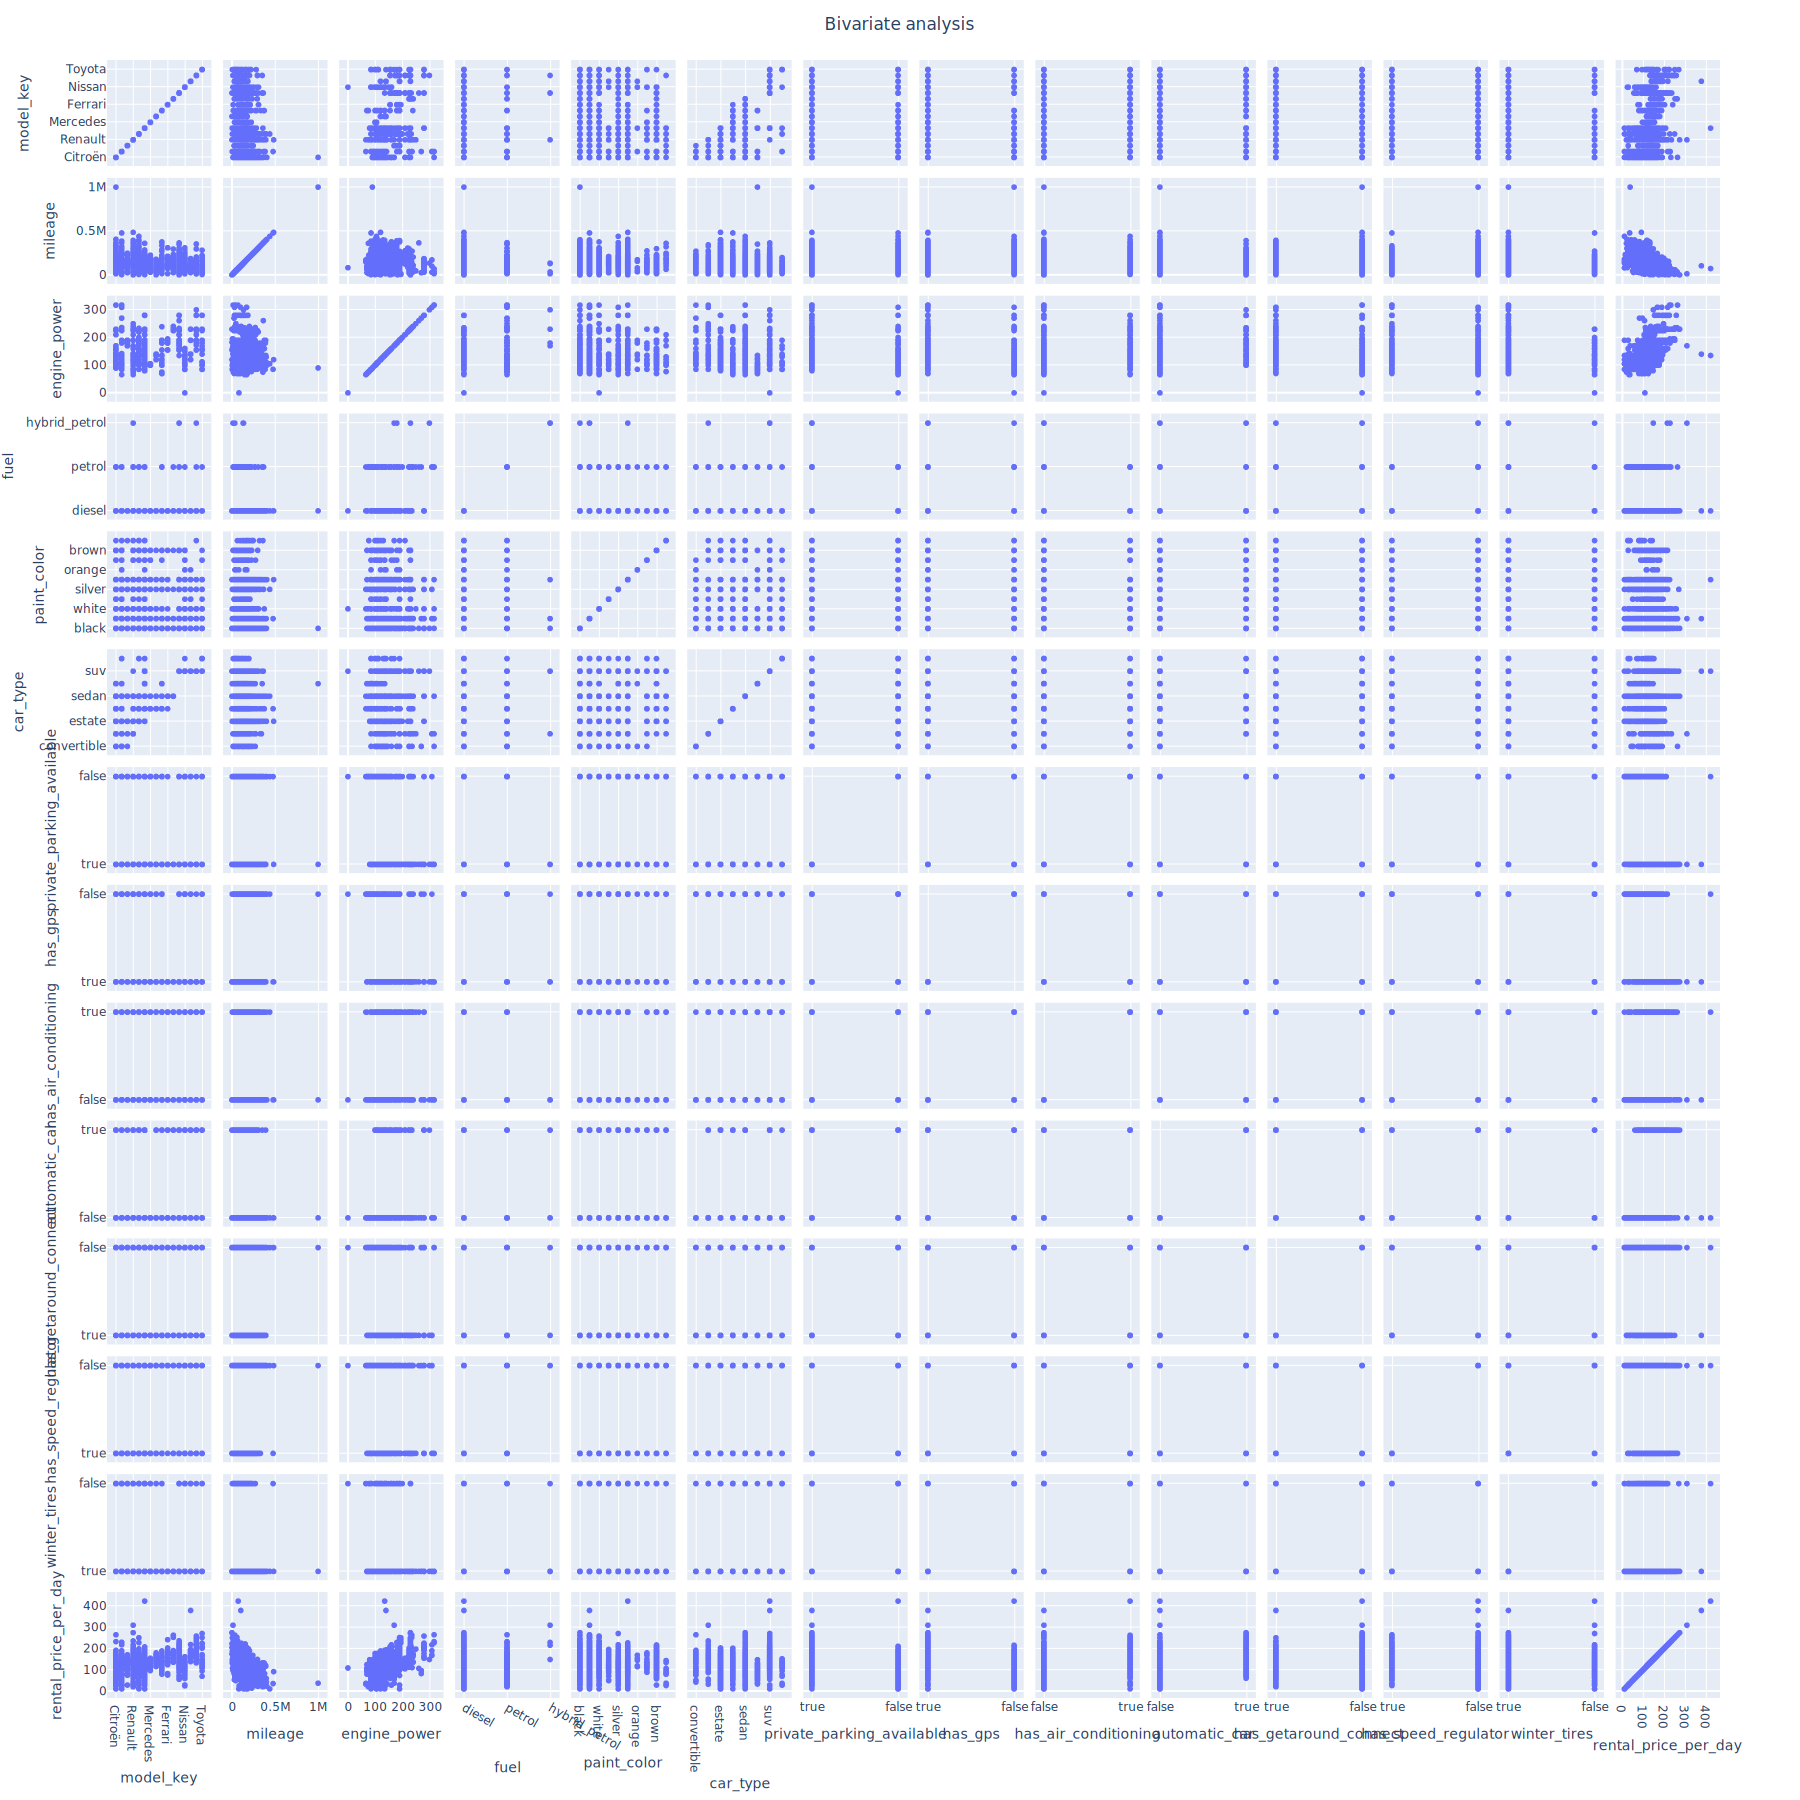

In [429]:
# Visualize pairwise dependencies
fig = px.scatter_matrix(dataset)
fig.update_layout(
        title = go.layout.Title(text = "Bivariate analysis", x = 0.5), showlegend = False, 
            autosize=False, height=1800, width = 1800)
fig.show()

It seems that there is a kind of correlation between the rental price per day and the mileage and engine_power :  
- The higher the mileage, the lower the price would be.
- The higher the engine power, the higher the price would be.

# 1/ Baseline model : linear regression

Let's build a baseline model with only the engine_power as a feature, because it is the feature that looks the most like a linear relation with the rental price per day.

In [430]:
# Separate target variable Y from features X
target_name = 'rental_price_per_day'
feature_name = ['engine_power']

Y = dataset.loc[:,target_name]
X = dataset.loc[:,feature_name]

In [431]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [432]:
numeric_features = ['engine_power']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])


In [433]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [434]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [435]:
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

In [436]:
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.3960444934596774
R2 score on test set :  0.3559204599011513


I chose the r2 score for the linear regression model. The score is quite low (0.35), I need to improve the model.

# 2/ Improved model : multivariate linear regression

Let's do some feature engineering :  
- add the feature 1/mileage (according to the curve in the bivariate analysis)

In [437]:
dataset['mileage_inverse'] = 1 / dataset['mileage']

In [438]:
dataset.head()

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day,mileage_inverse
0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106,0.000007
1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264,0.000072
2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101,0.000005
3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158,0.000008
4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183,0.000010


In [439]:
dataset['automatic_car'].dtypes

dtype('bool')

In [440]:
# Separate target variable Y from features X
target_name = 'rental_price_per_day'
feature_name = ['model_key', 'mileage', 'engine_power', 'fuel', 'paint_color', 'car_type', 'private_parking_available', 'has_gps', 'has_air_conditioning', 'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires', 'mileage_inverse']

Y = dataset.loc[:,target_name]
X = dataset.loc[:,feature_name]

In [441]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [442]:
numeric_features = ['mileage', 'engine_power', 'mileage_inverse']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


categorical_features = ['model_key', 'fuel', 'paint_color', 'car_type', 'private_parking_available', 'has_gps', 'has_air_conditioning', 'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires']
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', drop='first'))
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [443]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [444]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [445]:
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

In [446]:
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.7062930573996258
R2 score on test set :  0.7044320684030432


The score has improved a lot, it is now at 0.70, with no overfitting.  
Let's try to improve the model again.

# 3/ Improved model : Random Forest Regressor

In [447]:
model = RandomForestRegressor()

# Grid of values to be tested
params = {
    'max_depth': [14],
    'min_samples_leaf': [1],
    'min_samples_split': [3],
    'n_estimators': [100]
}

'''
params = {
    'max_depth': [13, 14, 15, 16],
    'min_samples_leaf': [1],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [100]
}
Best hyperparameters :  {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
Best validation accuracy :  0.7497776071508208
R2 score on training set :  0.9463204908146101
R2 score on test set :  0.7301049814289597


params = {
    'max_depth': [9, 10, 12, 14],
    'min_samples_leaf': [1],
    'min_samples_split': [1, 2, 3],
    'n_estimators': [90, 100, 110, 120]
}
Best hyperparameters :  {'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
Best validation accuracy :  0.7509225329565655
R2 score on training set :  0.938575349393663
R2 score on test set :  0.7344539640174486


params = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 4, 8],
    'n_estimators': [10, 20, 40, 60, 80, 100]
}
R2 score on training set :  0.8936831287000807
R2 score on test set :  0.7185289342937622
'''
gridsearch = GridSearchCV(model, param_grid = params, cv = 5, verbose = 2) # cv=5 because we did a train-test-split with test_size=0.2
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=14, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   3.1s
[CV] END max_depth=14, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   3.0s
[CV] END max_depth=14, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   3.1s
[CV] END max_depth=14, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   3.0s
[CV] END max_depth=14, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   3.0s
...Done.
Best hyperparameters :  {'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
Best validation accuracy :  0.7490248134134166


In [448]:
Y_train_pred = gridsearch.predict(X_train)
Y_test_pred = gridsearch.predict(X_test)

In [449]:
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9383016057672465
R2 score on test set :  0.7327873282006568


The score on the test set has improved (0.73 Vs 0.70 previously), but there is a lot of overfitting (0.94 for the train set).  
Let's have a look on the feature importance of the model.

In [450]:
column_names = []
for name, step, features_list in preprocessor.transformers_: # loop over steps of ColumnTransformer
    if name == 'num': # if pipeline is for numeric variables
        features = features_list # just get the names of columns to which it has been applied
    else: # if pipeline is for categorical variables
        features = step.get_feature_names_out() # get output columns names from OneHotEncoder
    column_names.extend(features) # concatenate features names
        
print("Names of columns corresponding to each coefficient: ", column_names)

Names of columns corresponding to each coefficient:  ['mileage', 'engine_power', 'mileage_inverse', 'model_key_BMW', 'model_key_Citroën', 'model_key_Ferrari', 'model_key_Maserati', 'model_key_Mercedes', 'model_key_Mitsubishi', 'model_key_Nissan', 'model_key_Opel', 'model_key_PGO', 'model_key_Peugeot', 'model_key_Renault', 'model_key_SEAT', 'model_key_Subaru', 'model_key_Toyota', 'model_key_Volkswagen', 'fuel_hybrid_petrol', 'fuel_petrol', 'paint_color_black', 'paint_color_blue', 'paint_color_brown', 'paint_color_green', 'paint_color_grey', 'paint_color_orange', 'paint_color_red', 'paint_color_silver', 'paint_color_white', 'car_type_coupe', 'car_type_estate', 'car_type_hatchback', 'car_type_sedan', 'car_type_subcompact', 'car_type_suv', 'car_type_van', 'private_parking_available_True', 'has_gps_True', 'has_air_conditioning_True', 'automatic_car_True', 'has_getaround_connect_True', 'has_speed_regulator_True', 'winter_tires_True']


In [451]:
# Create a pandas DataFrame
feature_importance = pd.DataFrame(index = column_names, data = gridsearch.best_estimator_.feature_importances_, columns=["feature_importances"])
feature_importance = feature_importance.sort_values(by = 'feature_importances')

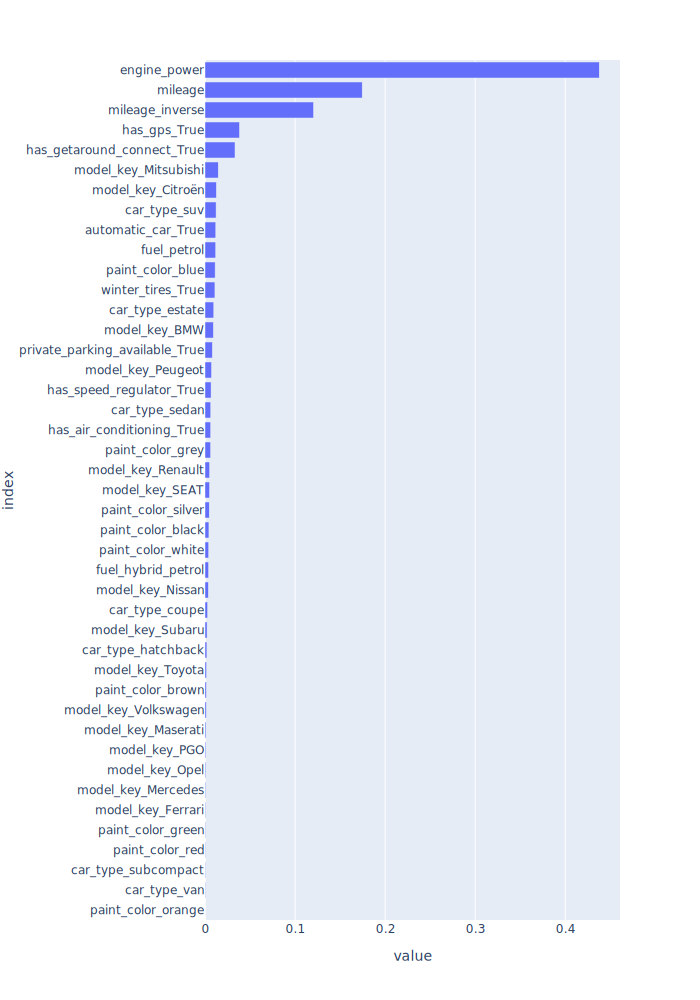

In [452]:
# Plot coefficients
fig = px.bar(feature_importance, orientation = 'h')
fig.update_layout(showlegend = False, 
                  margin = {'l': 120}, # to avoid cropping of column names
                  height = 1000
                 )
fig.show()

The random forest regressor model relies a lot on the engine power, the mileage and mileage_inverse features. The has_gps and has_getaround_connect are also important.  
Let's try the xgboost model to fight overfitting.

# 4/ Improved model : XGBoost Regressor

In [453]:
xgboost = XGBRegressor()

# Grid of values to be tested
params = {
    'max_depth': [9],
    'min_child_weight': [5], 
    'n_estimators': [19] 
}

'''
params = {
    'max_depth': [8, 9, 10, 11],
    'min_child_weight': [4, 5, 6], 
    'n_estimators': [18, 19, 20] 
}
Best hyperparameters :  {'max_depth': 9, 'min_child_weight': 5, 'n_estimators': 19}
Best validation accuracy :  0.7551649369641589
Accuracy on training set :  0.8913244564075061
Accuracy on test set :  0.7633176971231816

params = {
    'max_depth': [6, 8, 10, 12],
    'min_child_weight': [3, 4, 5, 6], 
    'n_estimators': [8, 15, 20, 25, 30] 
}
Best hyperparameters :  {'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 20}
Best validation accuracy :  0.7547425393071387
Accuracy on training set :  0.8857369229075822
Accuracy on test set :  0.7589019708295972
'''

gridsearch = GridSearchCV(xgboost, param_grid = params, cv = 5, verbose = 2) # cv=5 because we did a train-test-split with test_size=0.2
gridsearch.fit(X_train, Y_train)

print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

print("Accuracy on training set : ", gridsearch.score(X_train, Y_train))
print("Accuracy on test set : ", gridsearch.score(X_test, Y_test))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...max_depth=9, min_child_weight=5, n_estimators=19; total time=   0.1s
[CV] END ...max_depth=9, min_child_weight=5, n_estimators=19; total time=   0.0s
[CV] END ...max_depth=9, min_child_weight=5, n_estimators=19; total time=   0.0s
[CV] END ...max_depth=9, min_child_weight=5, n_estimators=19; total time=   0.0s
[CV] END ...max_depth=9, min_child_weight=5, n_estimators=19; total time=   0.0s
Best hyperparameters :  {'max_depth': 9, 'min_child_weight': 5, 'n_estimators': 19}
Best validation accuracy :  0.7551649369641589
Accuracy on training set :  0.8913244564075061
Accuracy on test set :  0.7633176971231816


In [454]:
Y_train_pred = gridsearch.predict(X_train)
Y_test_pred = gridsearch.predict(X_test)

In [455]:
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.8913244564075061
R2 score on test set :  0.7633176971231816


In [456]:
# Perform 5-fold cross-validation to validate that there is still some overfitting
print("5-fold cross-validation...")
model_to_test = XGBRegressor(max_depth = 9, min_child_weight = 5, n_estimators = 19)
scores = cross_val_score(model_to_test, X_train, Y_train, cv=5)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

5-fold cross-validation...
The cross-validated R2-score is :  0.7551649369641589
The standard deviation is :  0.0347600069438272


The score on the test set has been improved again (0.76 Vs 0.73) and the overfitting was reduced (0.89 Vs 0.94 on the train set).  
The cross validation shows that there is still some overfitting, but I choose to select this model as the best one.

In [457]:
column_names = []
for name, step, features_list in preprocessor.transformers_: # loop over steps of ColumnTransformer
    if name == 'num': # if pipeline is for numeric variables
        features = features_list # just get the names of columns to which it has been applied
    else: # if pipeline is for categorical variables
        features = step.get_feature_names_out() # get output columns names from OneHotEncoder
    column_names.extend(features) # concatenate features names
        
print("Names of columns corresponding to each coefficient: ", column_names)

Names of columns corresponding to each coefficient:  ['mileage', 'engine_power', 'mileage_inverse', 'model_key_BMW', 'model_key_Citroën', 'model_key_Ferrari', 'model_key_Maserati', 'model_key_Mercedes', 'model_key_Mitsubishi', 'model_key_Nissan', 'model_key_Opel', 'model_key_PGO', 'model_key_Peugeot', 'model_key_Renault', 'model_key_SEAT', 'model_key_Subaru', 'model_key_Toyota', 'model_key_Volkswagen', 'fuel_hybrid_petrol', 'fuel_petrol', 'paint_color_black', 'paint_color_blue', 'paint_color_brown', 'paint_color_green', 'paint_color_grey', 'paint_color_orange', 'paint_color_red', 'paint_color_silver', 'paint_color_white', 'car_type_coupe', 'car_type_estate', 'car_type_hatchback', 'car_type_sedan', 'car_type_subcompact', 'car_type_suv', 'car_type_van', 'private_parking_available_True', 'has_gps_True', 'has_air_conditioning_True', 'automatic_car_True', 'has_getaround_connect_True', 'has_speed_regulator_True', 'winter_tires_True']


In [458]:
# Create a pandas DataFrame
feature_importance = pd.DataFrame(index = column_names, data = gridsearch.best_estimator_.feature_importances_, columns=["feature_importances"])
feature_importance = feature_importance.sort_values(by = 'feature_importances')

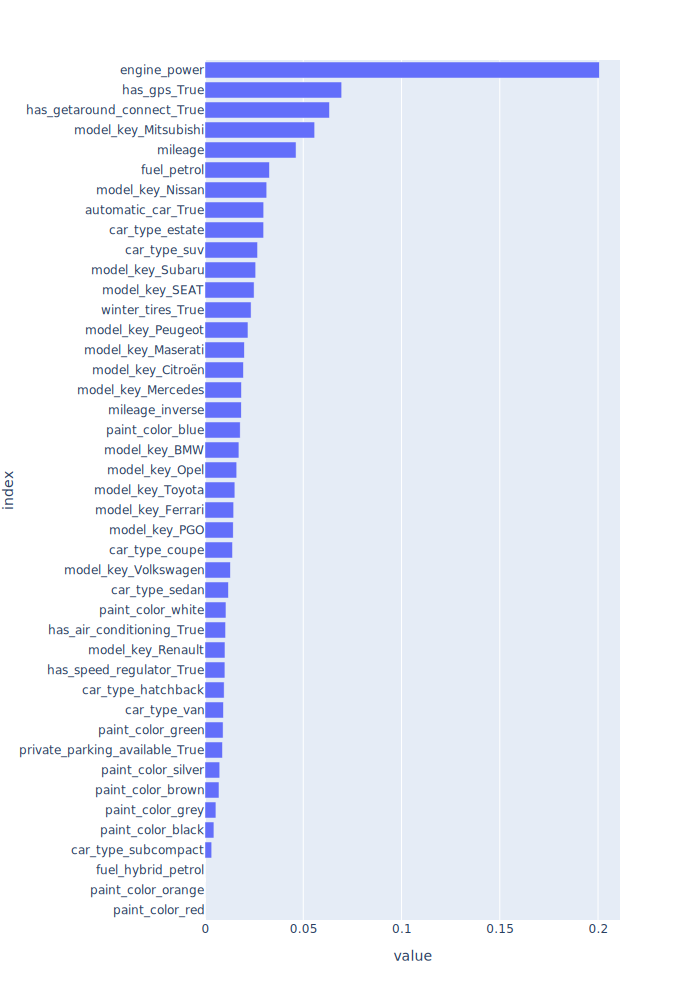

In [459]:
# Plot coefficients
fig = px.bar(feature_importance, orientation = 'h')
fig.update_layout(showlegend = False, 
                  margin = {'l': 120}, # to avoid cropping of column names,
                  height = 1000,
                 )
fig.show()

The xgboost model relies the most on the engine power, has_gps and has_getaround_connect features, followed by the model_key_Mitsubishi and the mileage. It is a little bit different from the random forest regressor model.

# 5/ Train on the whole dataset and save the best model (XGBoost Regressor)

In [460]:
model = XGBRegressor(max_depth=9, min_child_weight=5, n_estimators=19)

In [461]:
pipe = make_pipeline(preprocessor, model)
pipe.fit(X, Y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['mileage', 'engine_power',
                                                   'mileage_inverse']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore')...
                              feature_types=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_threshold=64, max_cat_to_onehot=4,
                              max_delta_step=0, max_depth=9, max_leaves=0,
                              min_child_weight=5, missing=nan,
                              monotone_constraints='()', n_estimators=19,
                              n_jobs=0, num_parallel_tree=1, predictor='auto',
                              random_state=0, ...))])

In [462]:
# save to joblib file
joblib.dump(pipe, 'online-API/xgbregressor.joblib')